## Load Packages

In [26]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Dataset

In [25]:
df = pd.read_csv("./winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Analysis 

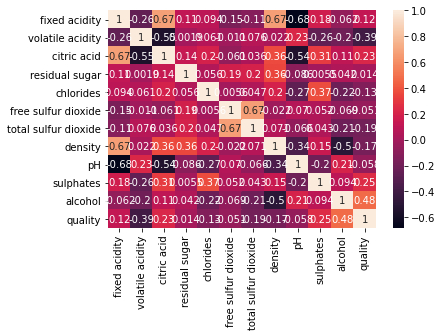

In [29]:
# corr matrix 
corrMatrix = df.corr()

# visual corr matrix 
sn.heatmap(corrMatrix, annot=True)
plt.show()

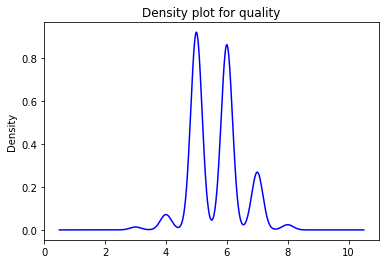

In [36]:
# Density plot for dependent variable "quality"
df.quality.plot.density(color='blue')
plt.title('Density plot for quality')
plt.show()

# seemingly normal distribution 

<AxesSubplot:title={'center':'fixed acidity'}, xlabel='quality'>

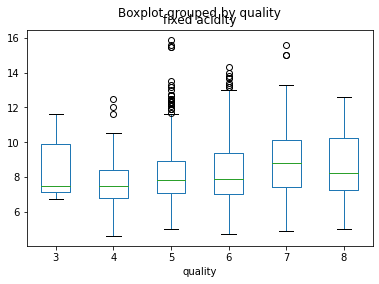

In [44]:
# box plots against quality 

df.boxplot(by ='quality', column =['fixed acidity'], grid = False)

<AxesSubplot:title={'center':'residual sugar'}, xlabel='quality'>

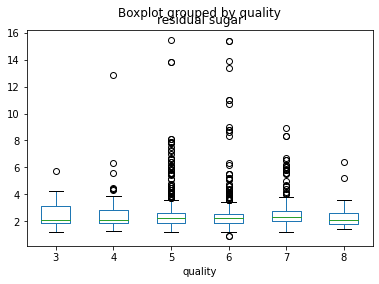

In [45]:
df.boxplot(by ='quality', column =['residual sugar'], grid = False)

## Linear Regression w TTS

In [54]:
# in KF

predictors = ['fixed acidity', 'volatile acidity','citric acid', 'residual sugar','chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


X_train, X_test, y_train, y_test = train_test_split(df[predictors],df["quality"], test_size = 0.2)

In [55]:
# create and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# predictions
y_pred = model.predict(X_test)

In [57]:
#testing R2
model.score(X_test, y_test)

0.2993292329726637

In [58]:
#training R2
model.score(X_train, y_train)

0.3736897817939051

In [59]:
# true vs. pred
true_vs_pred = pd.DataFrame({"predicted": y_pred, 
                            "true": y_test})

true_vs_pred

,predicted,true
400,5.056617,5
1570,6.324791,6
1485,5.212718,5
29,5.337606,6
462,6.370298,5
...,...,...
253,4.852215,5
947,6.503501,7
787,5.482013,6
1043,6.182869,7


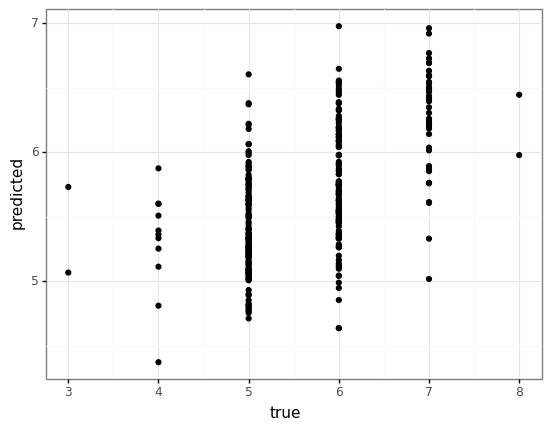

<ggplot: (8781258682504)>

In [69]:
ggplot(true_vs_pred, aes(x='true', y='predicted')) + geom_point() + theme_bw()

In [61]:
# coef df
coefficients = pd.DataFrame({"Coef": model.coef_,
                            "Name": predictors})
coefficients = coefficients.append({"Coef": model.intercept_,
                                   "Name": "intercept"}, ignore_index = True)
coefficients

,Coef,Name
0,0.022716,fixed acidity
1,-1.182729,volatile acidity
2,-0.177010,citric acid
3,0.006781,residual sugar
4,-2.144495,chlorides
5,0.005651,free sulfur dioxide
6,-0.003070,total sulfur dioxide
7,-13.941873,density
8,-0.389298,pH
9,0.940392,sulphates


coef plot

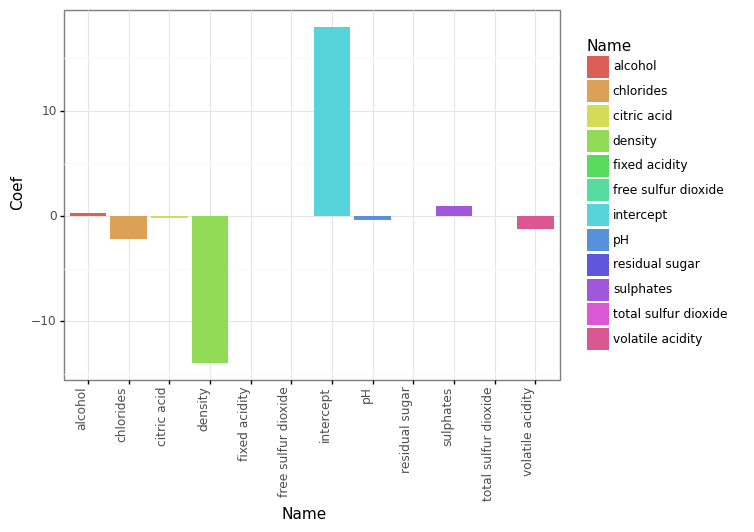

<ggplot: (8781259320757)>

In [70]:
# coef plot
(ggplot(coefficients, aes(x = "Name", y = "Coef", fill = "Name" )) + theme_bw() + geom_bar(stat = "identity")) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

## LASSO & Ridge Regression